# Group 15
- Muhamad Tio Ariyanto (Universitas Pendidikan Indonesia)
- Aji Muhammad Zapar (Universitas Pendidikan Indonesia)
- Alfen Fajri Nurulhaq (Universitas Pendidikan Indonesia)
- Shabrina Herawati (Universitas Muhammadiyah Karanganyar)
- Niswa Alfiyya (Universitas Pendidikan Indonesia)
- Farhan Ijaz Khan (University of Swabi)
- Zubair Ahmad (University of Swabi)

# Study Case : Sales Orders

## Data Explanation:
This dataset is having the 50000 sales orders data that consist of columns as following :
1. order_id: A unique identifier for each order placed.
2. quantity: The number of products ordered in a single order.
3. product_id: A unique identifier for each product ordered.
4. price: The price of the ordered product.
5. seller_id: A unique identifier for the seller who sold the product.
6. freight_value: The shipping cost value for the order delivery.
7. customer_id: A unique identifier for each customer who placed an order.
8. order_status: The status of the order, such as "shipped", "delivered", "canceled", etc.
9. purchase_date: The date when the order was placed.
10. payment_type: The payment method used by the customer, such as "virtual account", "e-wallet", "credit card", etc.
11. product_category_name: The category of the ordered product, such as "fashion", "automotive", "toys", etc.
12. product_weight_gram: The weight of the product in grams.

## Check and Prepare the Data
Before diving into the analysis, it's essential to ensure that the data is clean and ready for analysis. This involves:

- Loading the Data: Import the dataset and take an initial look at its structure.
- Handling Missing Values: Identify and fill or drop missing values.
- Data Type Conversion: Ensure all columns have appropriate data types (e.g., dates are in datetime format).
- Removing Duplicates: Check and remove any duplicate rows that might skew analysis result

In [101]:
# Import the library
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Load the data
df = pd.read_csv("/content/orderdataset.csv", delimiter=';')

In [103]:
# Display the first few rows of the dataset
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


In [104]:
# Show general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [105]:
# Check for missing values
df.isnull().sum()

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

In [106]:
# Clear the missing value
df.dropna(inplace=True)

In [107]:
# Remove duplicates
duplicated_data = df.duplicated().sum()
print(f"sum of duplicated data: {duplicated_data}")
if duplicated_data > 0:
  print(df[df.duplicated()])

sum of duplicated data: 0


In [108]:
# Ensure consistency (e.g., correct data types)
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%d/%m/%Y')

## Summarize the Data with Statistical Analysis
We will calculate some key statistics such as total sales, average sales, top-selling products, etc.

In [109]:
# Descriptive statistics
print(df.describe())

           quantity         price  freight_value  \
count  49980.000000  4.998000e+04   49980.000000   
mean       1.197519  2.607874e+06  104518.707483   
min        1.000000  2.000000e+05    9000.000000   
25%        1.000000  1.411000e+06   57000.000000   
50%        1.000000  2.610000e+06  104000.000000   
75%        1.000000  3.810000e+06  152000.000000   
max       21.000000  5.000000e+06  200000.000000   
std        0.722372  1.388282e+06   55180.931697   

                       purchase_date  product_weight_gram  
count                          49980         49980.000000  
mean   2017-08-06 19:56:34.285714432          2201.830892  
min              2016-09-05 00:00:00            50.000000  
25%              2017-05-25 00:00:00           300.000000  
50%              2017-08-21 00:00:00           800.000000  
75%              2017-11-03 00:00:00          1850.000000  
max              2017-12-15 00:00:00         40425.000000  
std                              NaN          3929.

In [110]:
# Calculate the total sales amount
total_sales = df['price'].sum()
print(f"total sales amount: {total_sales}")

total sales amount: 130341531000


In [111]:
# Summarize averages sales amount
average_sales = df['price'].mean()
print(f"Avg sales amount: {average_sales}")

Avg sales amount: 2607873.769507803


In [112]:
# Find the minimum and maximum sales amount
min_sales = df['price'].min()
max_sales = df['price'].max()
print(f"min sales amount: {min_sales}")
print(f"max sales amount: {max_sales}")

min sales amount: 200000
max sales amount: 5000000


In [113]:
# Count the unique products sold
unique_products_count = df['product_id'].nunique()
print(f"Unique Products Sold: {unique_products_count}")

Unique Products Sold: 16864


In [114]:
# Group the data by product_id and sum the quantity to get the top selling products
top_products = df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)
print("Top Products Sold By Quantity:")
print(top_products)

Top Products Sold By Quantity:
product_id
422879e10f46682990de24d770e7f83d    464
99a4788cb24856965c36a24e339b6058    406
389d119b48cf3043d311335e499d9c6b    285
53759a2ecddad2bb87a079a1f1519f73    275
154e7e31ebfa092203795c972e5804a6    237
                                   ... 
6e62e31b1ec621d6182feb6b39c4194c      1
6e69b019a5ce263335eacafaa68ffeba      1
6e7068f054aef49b1900247c5c1b752b      1
6e79f7513adfd9ac67faa19f0d4ace53      1
fff9553ac224cec9d15d49f5a263411f      1
Name: quantity, Length: 16864, dtype: int64


In [115]:
# Calculate the total quantity of products sold
total_quantity_sold = df['quantity'].sum()
print(f"total quantity of products sold:", "{:,}".format(total_quantity_sold))

total quantity of products sold: 59,852


In [116]:
# Displaying Total profit
df['total_profit'] = df['price'] * df['quantity']
total_profit = df['total_profit'].sum()
print("Total profit:", "{:,}".format(total_profit))

Total profit: 156,000,809,000


In [117]:
# Get the count of orders by status
orders_by_status = df['order_status'].value_counts()
print("Order by status:", orders_by_status)

Order by status: order_status
delivered      48645
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: count, dtype: int64


In [118]:
# Aggregate the data by product category
category_agg = df.groupby('product_category_name').agg({
    'price' : ['sum', 'mean', 'min', 'max'],
    'quantity' : 'sum',
    'order_id' : 'count'
})

category_agg.columns = ['total_sales', 'average_sales', 'min_sales', 'max_sales', 'total_quantity', 'total_orders']
print("Agg per product category:")
print(category_agg)

Agg per product category:
                       total_sales  average_sales  min_sales  max_sales  \
product_category_name                                                     
automotive             16487385000   2.623709e+06     200000    4999000   
beauty                 16266276000   2.614316e+06     200000    5000000   
electronics            16248217000   2.579901e+06     200000    4999000   
fashion                16427270000   2.619144e+06     201000    5000000   
gadget                 16055437000   2.582506e+06     200000    5000000   
sports                 16214246000   2.620696e+06     204000    4999000   
toys                   16599763000   2.604702e+06     201000    4999000   
utilities              16042937000   2.618400e+06     201000    4999000   

                       total_quantity  total_orders  
product_category_name                                
automotive                       7501          6284  
beauty                           7448          6222  
electro

## Identify Significant Correlations

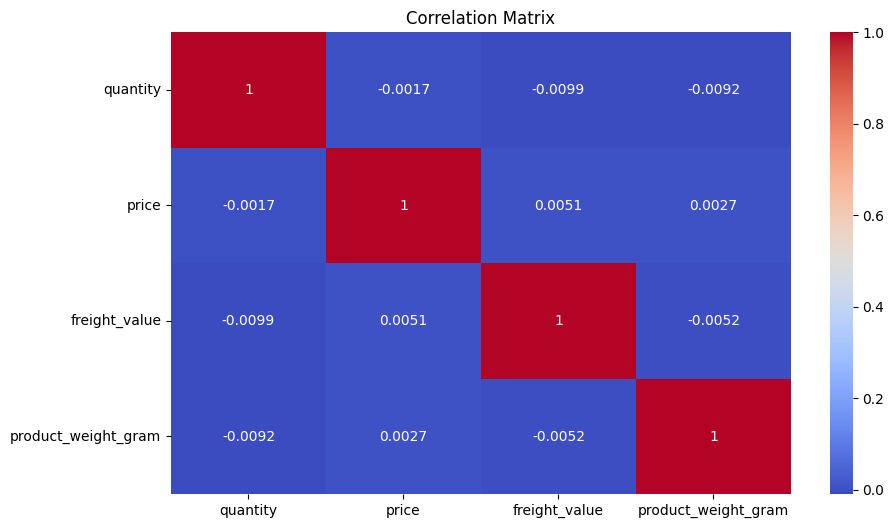

In [119]:
# Correlation matrix
correlation_matrix = df[['quantity', 'price', 'freight_value', 'product_weight_gram']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The correlation coefficients between all pairs of variables are very close to zero, indicating that there are no strong linear relationships between these variables in this dataset.
- The variables such as quantity, price, freight value, and product weight do not significantly influence each other linearly.

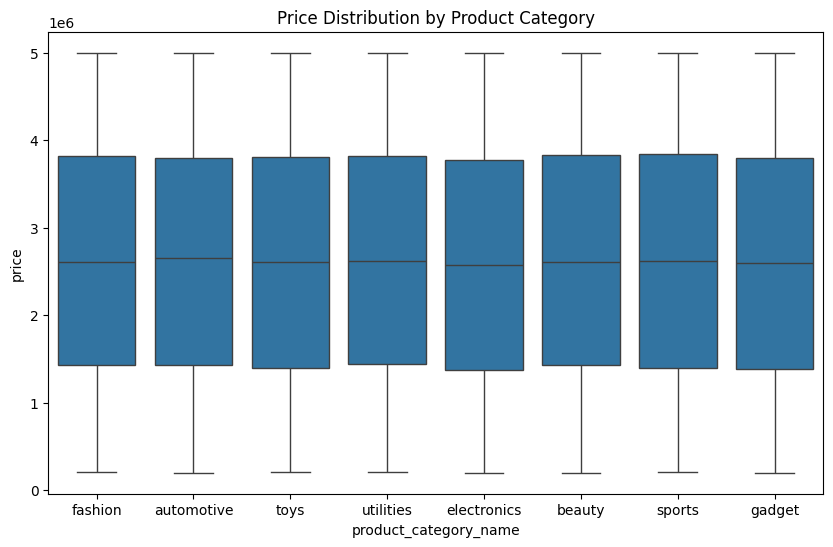

In [120]:
# Boxplot comparison of price by product_category_name
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category_name', y='price', data=df)
plt.title('Price Distribution by Product Category')
plt.show()

- The overall price range for all categories is quite similar, spanning from approximately 0 to 5 million. This indicates a broad pricing strategy, possibly catering to both budget-conscious and premium-seeking consumers across all categories.
- The median prices across categories are relatively close, around the 2.5 million mark. This suggests a standard pricing model, potentially indicating a mid-range target market.
- The IQR (the box) is similar for all categories, suggesting that the central 50% of prices for each category is comparably distributed. This uniformity might point towards a standardized pricing policy across different product lines.
- The presence of whiskers extending to the same range in all categories indicates similar variability in pricing.
- There are no extreme outliers, which implies controlled pricing without significant deviations.


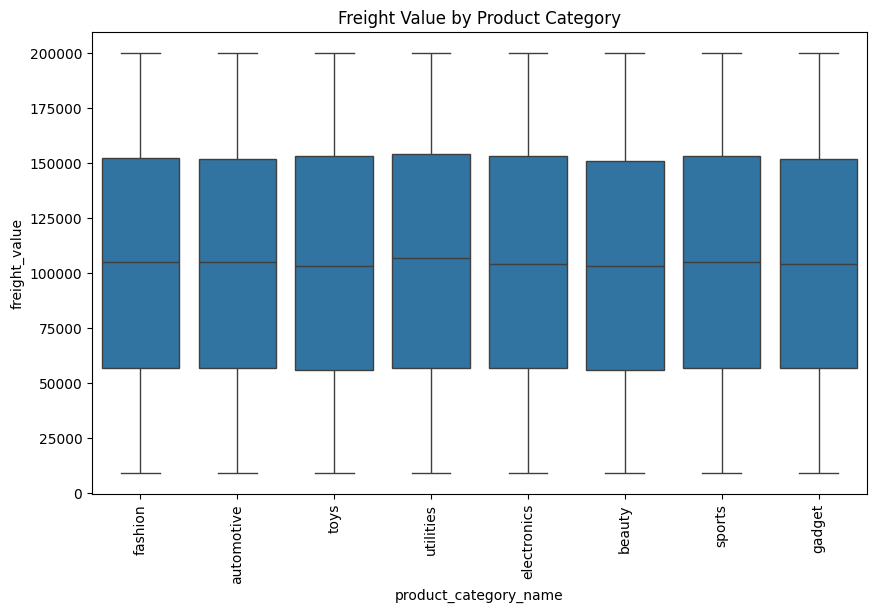

In [121]:
# Boxplot comparison of freight_value by product_category_name
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_category_name', y='freight_value', data=df)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.title('Freight Value by Product Category')
plt.show()

- The median freight value across all product categories appears to be relatively similar, suggesting that the cost to ship these items does not vary significantly by category.
- The interquartile range (IQR), representing the middle 50% of the data, is also consistent across categories, indicating uniform freight costs within each category.
- The spread of the whiskers (indicating the range of most of the data) is quite similar across all categories, which means the overall variability in freight costs is comparable.

## Data Visualization
We'll create several graphs to visualize the key statistics and relationships.

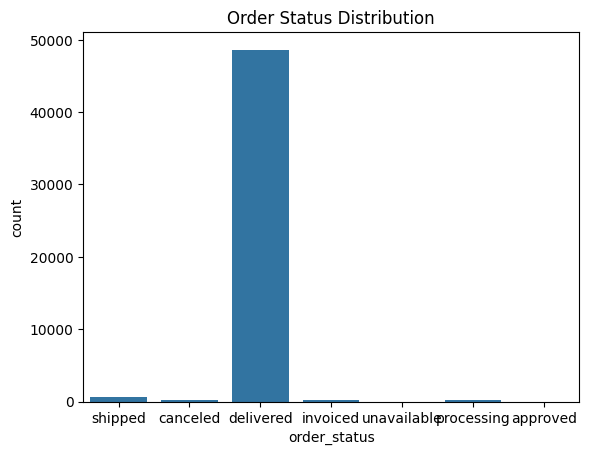

In [122]:
# Distribution of 'order_status'
sns.countplot(data=df, x='order_status')
plt.title('Order Status Distribution')
plt.show()

- The overwhelming majority of orders are marked as "delivered." This indicates a high fulfillment rate, which is a positive sign for the logistical efficiency and reliability of the business.
- Orders with statuses such as "shipped," "canceled," "invoiced," "unavailable," "processing," and "approved" are significantly lower in comparison. This suggests that most orders proceed smoothly through the sales and delivery process without many cancellations or delays.

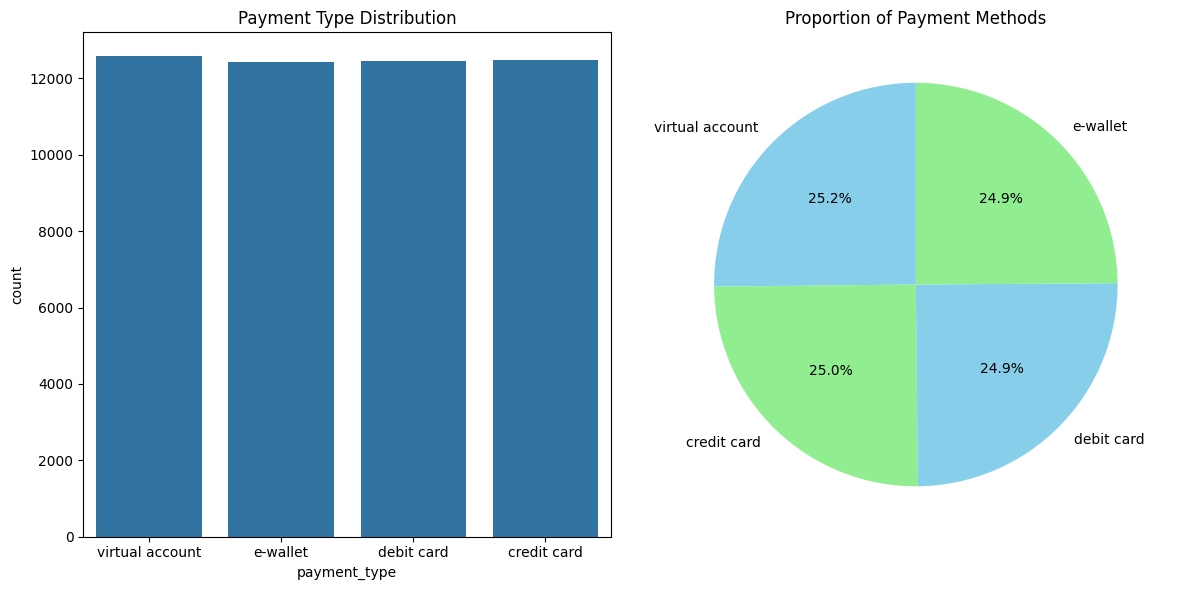

In [123]:
# Distribution of 'payment_type'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(data=df, x='payment_type', ax=ax1)
ax1.set_title('Payment Type Distribution')

payment_counts = df['payment_type'].value_counts()
payment_proportions = payment_counts / payment_counts.sum()

payment_proportions.plot.pie(ax=ax2, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
ax2.set_title('Proportion of Payment Methods')
ax2.set_ylabel('')  # Remove y-label

plt.tight_layout()
plt.show()

- The distribution of payment types—virtual account, e-wallet, debit card, and credit card—is quite balanced. This indicates that consumers are comfortable using a variety of payment methods.
- The slight dominance of virtual accounts and e-wallets suggests a trend towards digital payment methods. This aligns with the growing global shift towards cashless transactions.

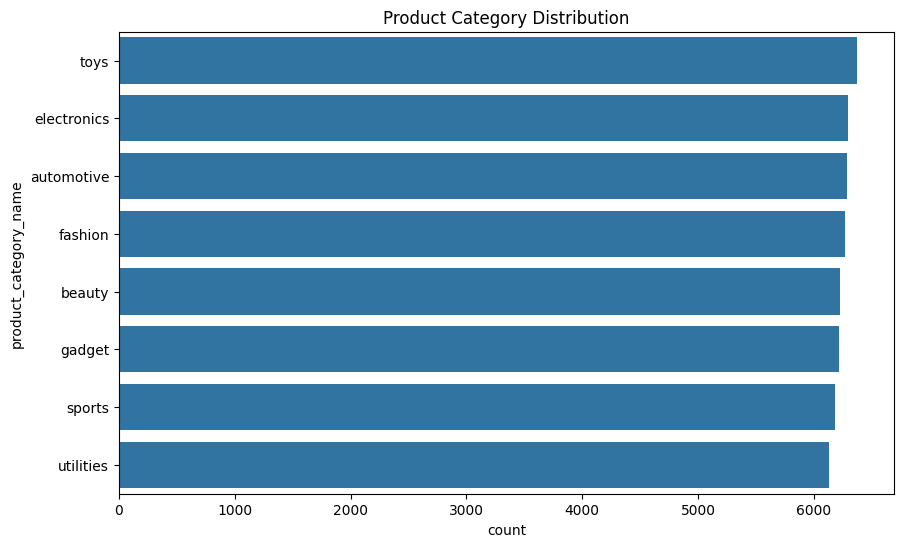

In [124]:
# Distribution of 'product_category_name'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='product_category_name', order=df['product_category_name'].value_counts().index)
plt.title('Product Category Distribution')
plt.show()

- The sales distribution across product categories such as toys, electronics, automotive, fashion, beauty, gadgets, sports, and utilities is relatively even, indicating a diversified portfolio and balanced consumer interest across different sectors.
- Categories like toys have slightly higher counts, suggesting these might be particularly popular among consumers.


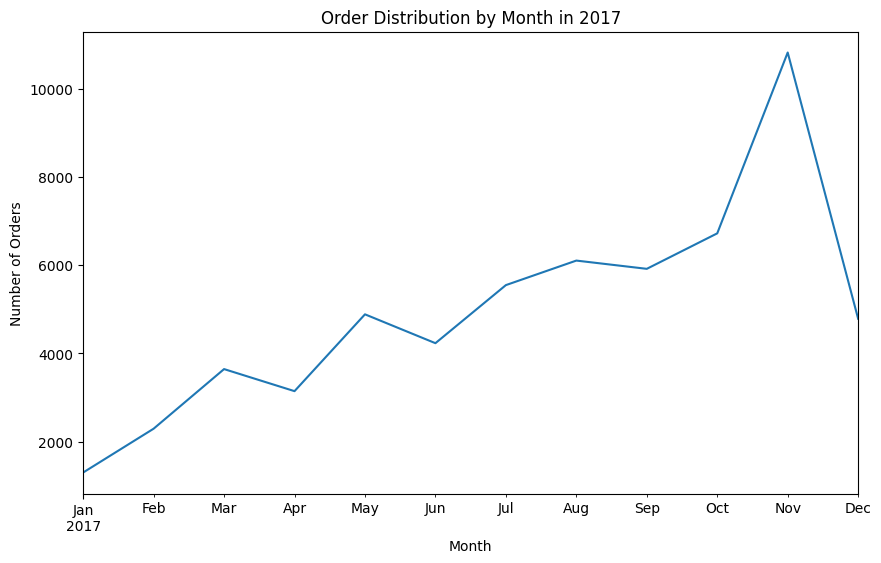

In [125]:
# Filter the data to include only the year 2017
df_2017 = df[df['purchase_date'].dt.year == 2017]

# Calculate the monthly sales for 2017
monthly_sales_2017 = df_2017.resample('M', on='purchase_date')['quantity'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
monthly_sales_2017.plot(kind='line')
plt.title('Order Distribution by Month in 2017')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

- The number of orders generally increases from January to November, with a significant spike in November. This indicates a growing consumer interest and possibly an increase in promotional activities or product launches throughout the year.
- The peak in November suggests a strong seasonal effect, likely due to major shopping events such as Black Friday and early holiday shopping.
- The sharp decline in December is due to the date of the data only reaching December 15, which means only half of December and not the full month.

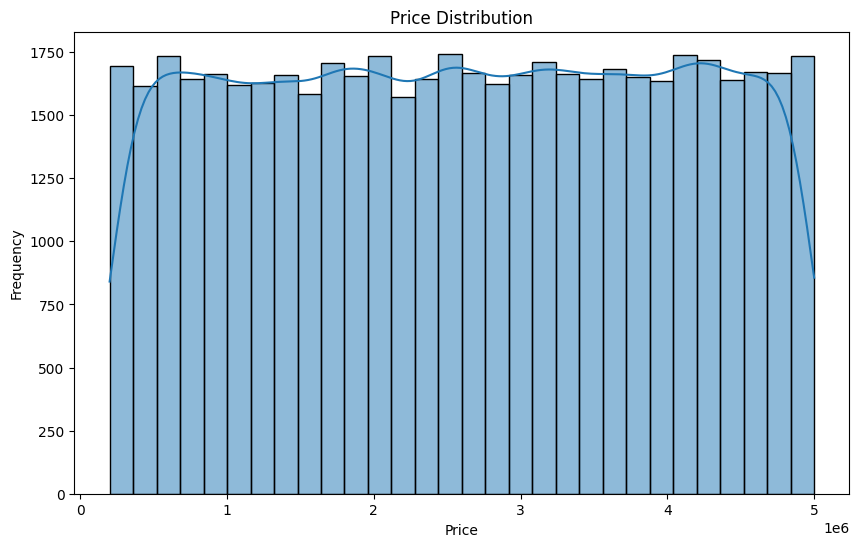

In [126]:
# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The price distribution appears to be fairly uniform across the range, indicating that products are being sold at a wide variety of price points without significant skew towards any particular price range.

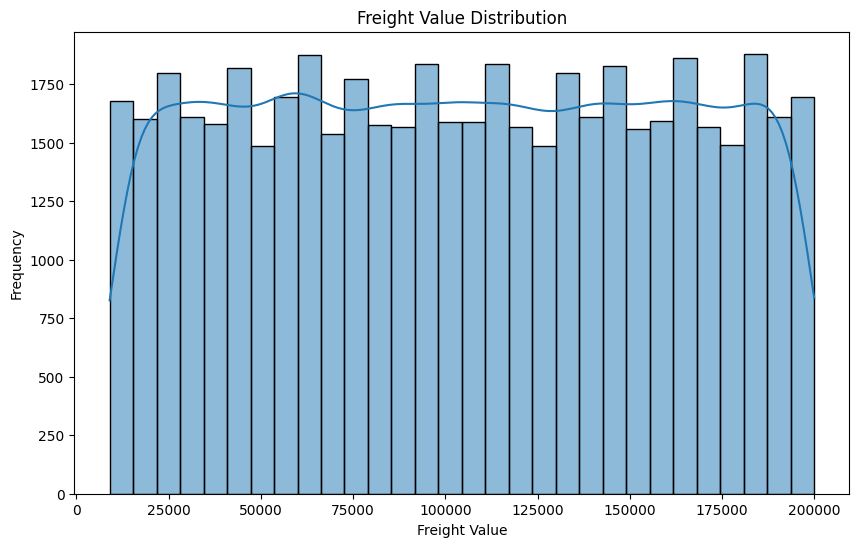

In [127]:
# Distribution of freight_value
plt.figure(figsize=(10, 6))
sns.histplot(df['freight_value'], bins=30, kde=True)
plt.title('Freight Value Distribution')
plt.xlabel('Freight Value')
plt.ylabel('Frequency')
plt.show()

The freight value distribution appears relatively uniform across the range, indicating that shipping costs are spread fairly evenly across different orders.